In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from zipline.api import symbol, order_target_percent

from zipline import run_algorithm

import pytz

In [2]:
djia_stocks = [
    'AAPL',
    'AXP',
    'BA',
    'CAT',
    'CSCO',
    'CVX',
    'DIS',
    'DWDP',
    'GS',
    'HD',
    'IBM',
    'INTC',
    'JNJ',
    'JPM',
    'KO',
    'MCD',
    'MMM',
    'MRK',
    'MSFT',
    'NKE',
    'PFE',
    'PG',
    'TRV',
    'UNH',
    'UTX',
    'V',
    'VZ',
    'WBA',
    'WMT',
    'XOM'
]

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2003-01-02 21:00:00+00:00,NaN,0.000000,None,0.0,NaN,None,0.000000,10000.000000,0.000,0.000,...,0.00,0.00,0,NaN,10000.000000,0.000,0.000,1,[],0.0
2003-01-03 21:00:00+00:00,0.002989,-0.000266,None,0.0,0.0,None,-5038.482910,4961.517090,5035.820,5035.820,...,0.00,0.00,0,-11.224972,10000.000000,0.000,0.000,2,"[{'commission': None, 'dt': 2003-01-03 21:00:0...",0.0
2003-01-06 21:00:00+00:00,0.136767,0.014517,None,0.0,0.0,None,-335.323575,4626.193515,5518.980,5518.980,...,0.00,0.00,0,499.790886,4961.517090,5035.820,5035.820,3,"[{'commission': None, 'dt': 2003-01-06 21:00:0...",0.0
2003-01-07 21:00:00+00:00,0.131208,0.010623,None,0.0,0.0,None,-620.973320,4005.220195,6101.010,6101.010,...,0.00,0.00,0,22.036096,4626.193515,5518.980,5518.980,4,"[{'commission': None, 'dt': 2003-01-07 21:00:0...",0.0
2003-01-08 21:00:00+00:00,0.152270,-0.001107,None,0.0,0.0,None,579.845925,4585.066120,5403.860,5403.860,...,0.00,0.00,0,-0.536686,4005.220195,6101.010,6101.010,5,"[{'commission': None, 'dt': 2003-01-08 21:00:0...",0.0
2003-01-09 21:00:00+00:00,0.156427,0.010568,None,0.0,0.0,None,624.660240,5209.726360,4895.950,4895.950,...,0.00,0.00,0,5.704464,4585.066120,5403.860,5403.860,6,"[{'commission': None, 'dt': 2003-01-09 21:00:0...",0.0
2003-01-10 21:00:00+00:00,0.143357,0.010250,None,0.0,0.0,None,-901.934940,4307.791420,5794.705,5794.705,...,0.00,0.00,0,5.125213,5209.726360,4895.950,4895.950,7,"[{'commission': None, 'dt': 2003-01-10 21:00:0...",0.0
2003-01-13 21:00:00+00:00,0.132753,0.011249,None,0.0,0.0,None,0.000000,4307.791420,5804.700,5804.700,...,0.00,0.00,0,5.248140,4307.791420,5794.705,5794.705,8,[],0.0
2003-01-14 21:00:00+00:00,0.124945,0.015335,None,0.0,0.0,None,-44.418850,4263.372570,5889.980,5889.980,...,0.00,0.00,0,6.695918,4307.791420,5804.700,5804.700,9,"[{'commission': None, 'dt': 2003-01-14 21:00:0...",0.0
2003-01-15 21:00:00+00:00,0.131028,0.005477,None,0.0,0.0,None,-314.999590,3948.372980,6106.400,6106.400,...,0.00,0.00,0,1.854647,4263.372570,5889.980,5889.980,10,"[{'commission': None, 'dt': 2003-01-15 21:00:0...",0.0


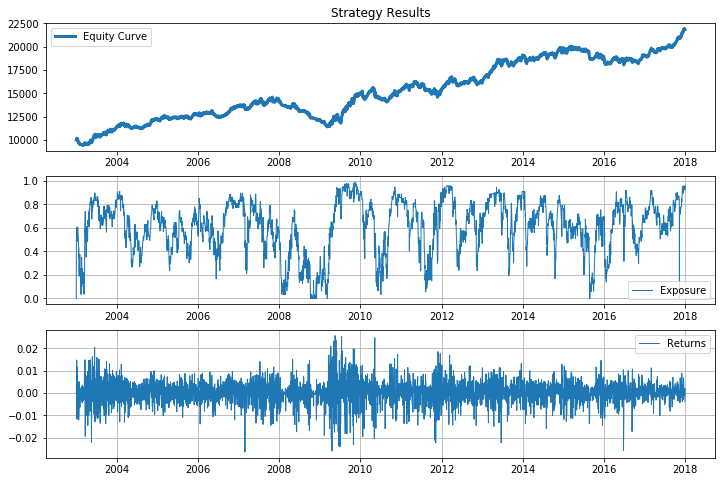

In [3]:
def initialize(context):
    #make a list of stocks
    context.dji_symbols = [ symbol(ticker) for ticker in djia_stocks ]
    
    #moving average
    context.index_average_window = 100
    
def handle_data(context, data):
    
    #get history of all the stocks
    
    stock_hist = data.history(context.dji_symbols, "close", context.index_average_window, "1d")
    
    #print(type(stock_hist))
    
    #print(stock_hist.head())
    
    stock_analytics = pd.DataFrame()
    
    #calc weight (bool)
    stock_analytics[ 'above_mean' ] = stock_hist.iloc[ -1 ] > stock_hist.mean()
    
    #print( type(stock_analytics) )
    #print( stock_analytics.head() )
    
    #calc weight ( 1/30 float)
    stock_analytics.loc[ stock_analytics['above_mean'] == True, 'weight' ] = 1 / len(context.dji_symbols)
    
    #calc weight (0)
    stock_analytics.loc[ stock_analytics['above_mean'] == False, 'weight' ] = 0.0
    
    #iterate each row
    
    for stock, analytics in stock_analytics.iterrows():
        #check if the stock still trades
        if data.can_trade( stock ):
            order_target_percent( stock, analytics['weight'] )

def analyze(context, perf ):
    
    fig = plt.figure( figsize= (12,8))
    
    #first chart portfolio value
    ax = fig.add_subplot(311)
    ax.set_title('Strategy Results')
    ax.plot( perf['portfolio_value'], linestyle='-', label='Equity Curve', linewidth=3.0 )
    ax.legend()
    ax.grid(False)
    
    #second chart leverage
    ax = fig.add_subplot(312)
    ax.plot(perf['gross_leverage'], label='Exposure', linestyle='-', linewidth=1.0 )
    ax.legend()
    ax.grid(True)
    
    #third chart returns
    
    ax = fig.add_subplot(313)
    ax.plot(perf['returns'], label='Returns', linestyle='-', linewidth=1.0)
    ax.legend()
    ax.grid(True)

    
#set time frame

start_date = datetime(2003, 1, 1, tzinfo=pytz.UTC)
end_date = datetime(2017, 12, 31, tzinfo=pytz.UTC)

#run algo

run_algorithm( start=start_date, 
              end=end_date, 
              initialize=initialize, 
              analyze=analyze, 
              handle_data=handle_data,
              capital_base=10000,
             data_frequency='daily',
             bundle='quandl')
    
    
    
    